In [34]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['cf807027e00d476eb027633d5d3d9411.f-id.02693ef099ad4bd0bcc77eb2d11e9b3d']
ds = experiment.get_intermediate_dataset(
    node_id='9e612a75-50c8-4c5f-8b5b-6b26d02daad9-5188',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [35]:
frame

,Dest_iD,Dest_city,Dest_state,Dest_name,origin_ID,origin_city,origin_state,origin_name,Year,Month,...,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,6,0.0,32,36,1,0
1,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,13,0.0,32,40,1,0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,15,1.0,32,44,1,0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,-2,0.0,32,2,0,0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,3,0.0,32,25,1,0
5,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,-2,0.0,32,28,1,0
6,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,7,0.0,32,44,1,0
7,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,-2,0.0,32,11,0,0
8,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,-3,0.0,42,-2,0,0
9,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,2013,4,...,US,14107,10299,1950,2,0.0,32,10,0,0


In [36]:
def describe(df, col):
    ## Compute the summary stats
    desc = df[col].describe()
    
    ## Change the name of the 50% index to median
    idx = desc.index.tolist()
    idx[5] = 'median'
    desc.index = idx
    return desc

In [37]:
describe(frame, 'ArrDelay')

count     2.719397e+06
mean      6.566923e+00
std       3.844812e+01
min      -9.400000e+01
25%      -1.100000e+01
median   -3.000000e+00
75%       1.000000e+01
max       1.845000e+03
Name: ArrDelay, dtype: float64

In [38]:
def plotstats(df, col):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    ## First a box plot
    df.dropna().boxplot(col, ax = ax[0], vert=False,
                        return_type='dict')
    ## Plot the histogram   
    temp = df[col].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    plt.xlabel(col)
    return [col]

['ArrDelay']

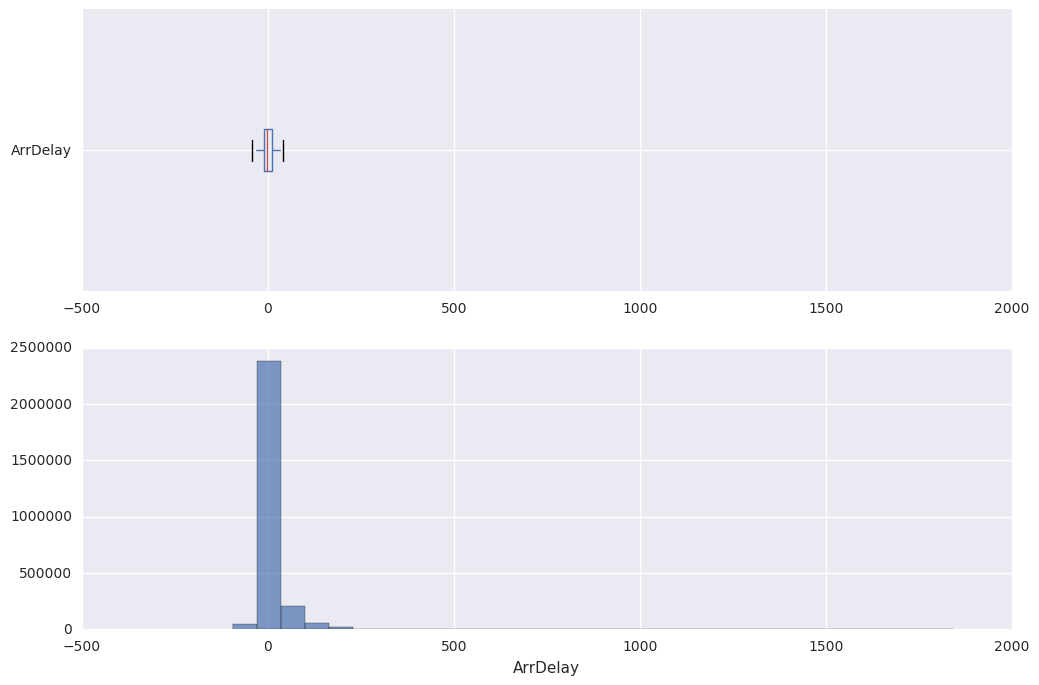

In [39]:
%matplotlib inline
plotstats(frame, 'ArrDelay')

'ArrDel15'

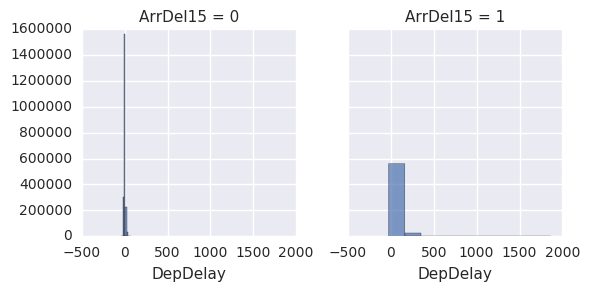

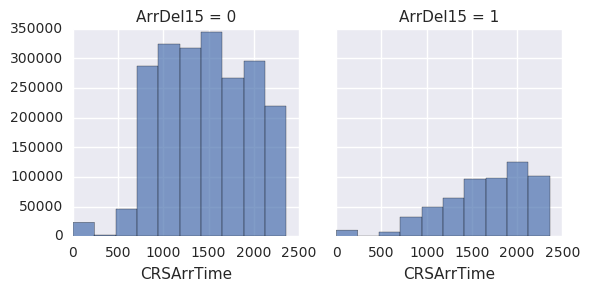

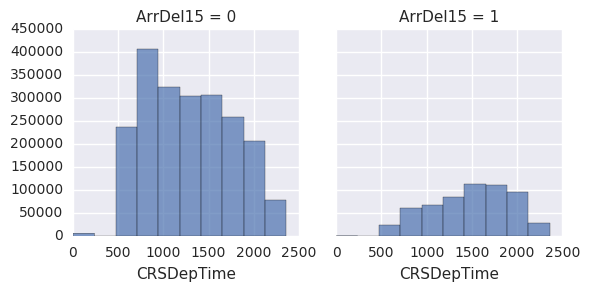

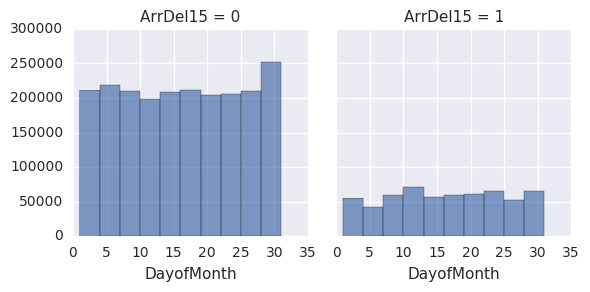

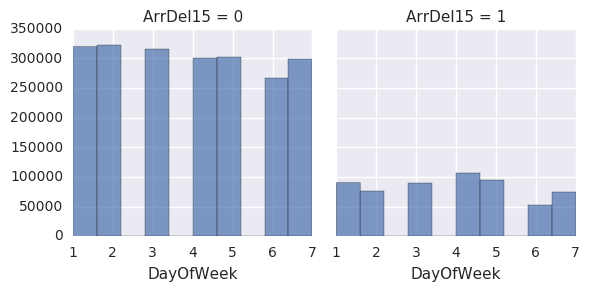

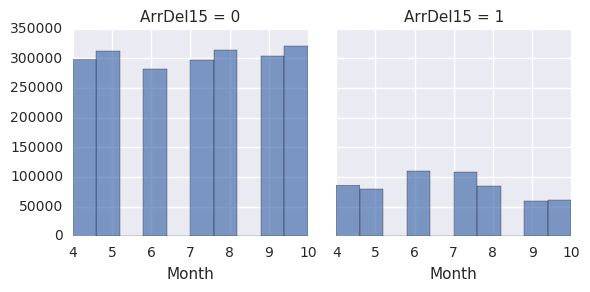

In [40]:
# Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["DepDelay",
               "CRSArrTime",
               "CRSDepTime",
               "DayofMonth",
               "DayOfWeek",
               "Month"]

cond_hists(frame, plot_cols2, 'ArrDel15')

['DepDelay', 'CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DayOfWeek', 'Month']

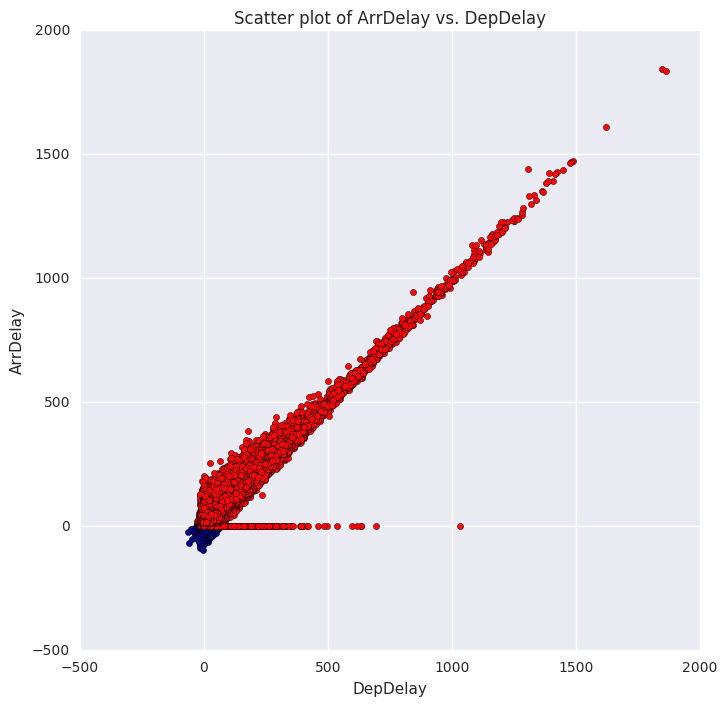

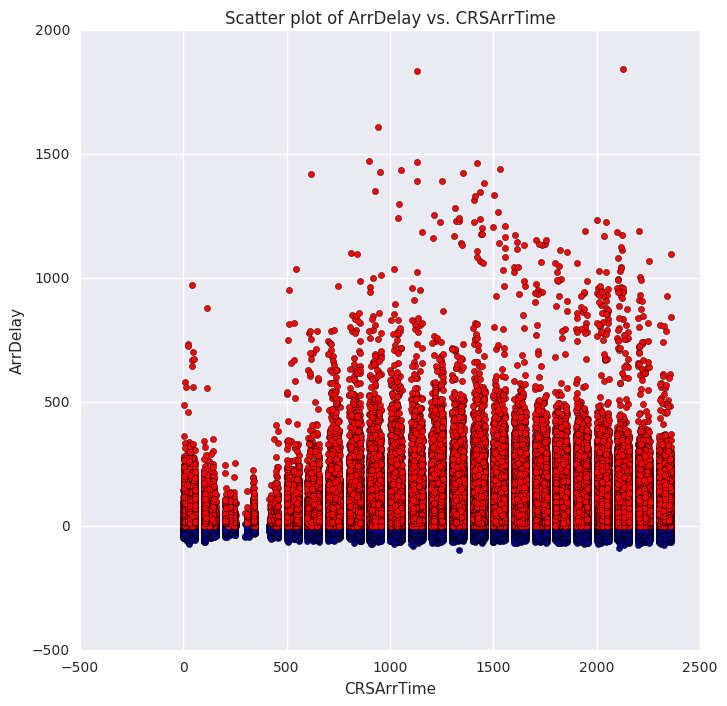

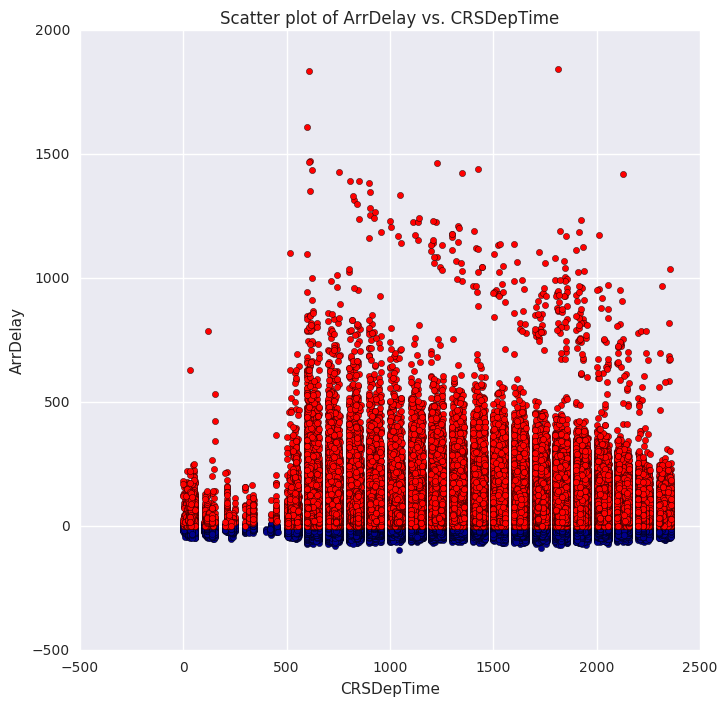

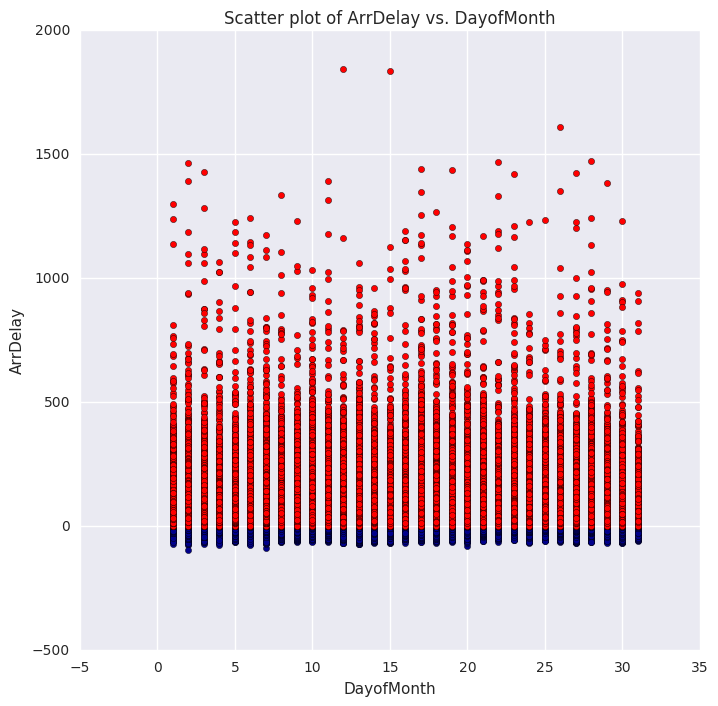

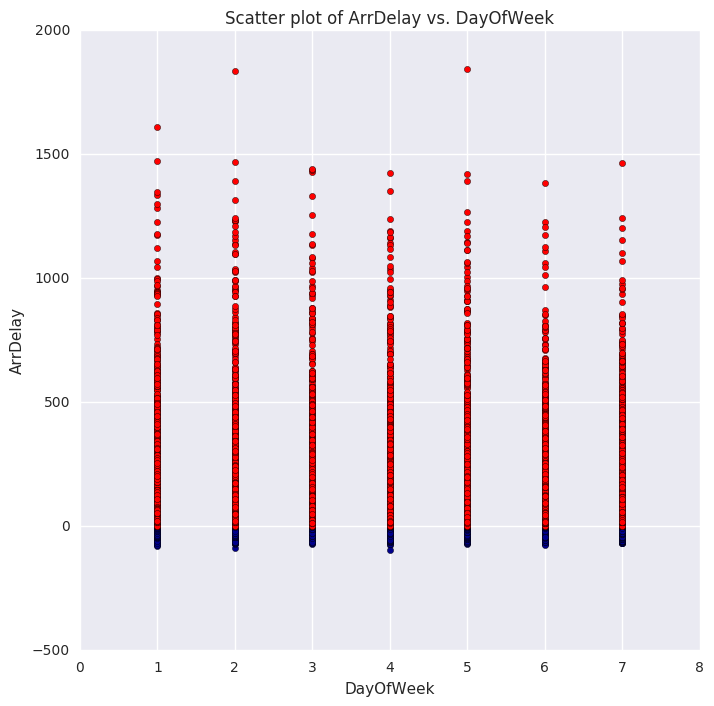

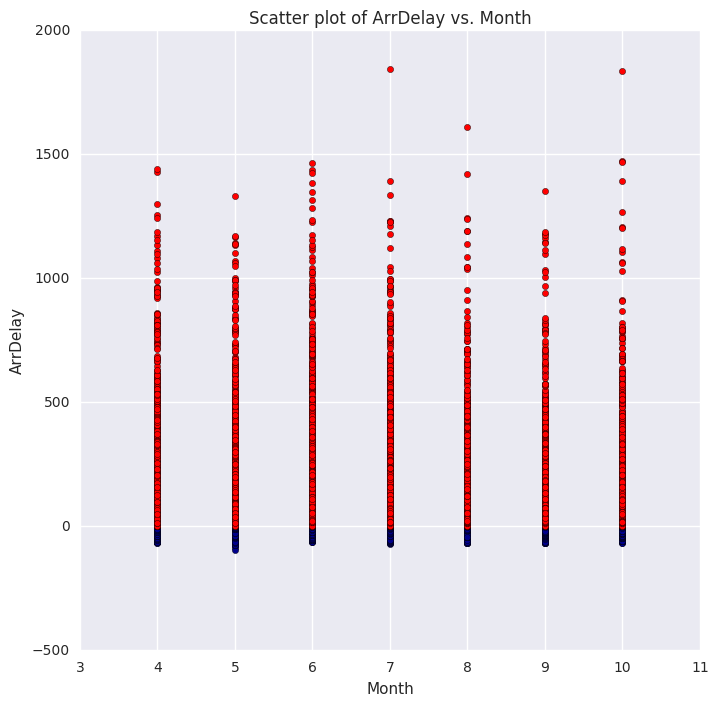

In [43]:
## Create scatter plot
def auto_scatter(df, plot_cols):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca()
        temp1 = df.ix[df['ArrDel15'] == 0]       
        temp2 = df.ix[df['ArrDel15'] == 1]
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'ArrDelay' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'ArrDelay' , 
                           ax = ax, color = 'Red') 
        ax.set_title('Scatter plot of ArrDelay vs. ' + col)
    return plot_cols

## Define columns for making scatter plots
plot_cols3 = ["DepDelay",
               "CRSArrTime",
               "CRSDepTime",
               "DayofMonth",
               "DayOfWeek",
               "Month"]

auto_scatter(frame, plot_cols3)